# Table of Contents
1. [Introduction](#introduction)
2. [Objective and Challenges](#objective-and-challenges)
    - [Primary Objective](#primary-objective)
    - [Challenges](#challenges)
3. [Genetic Algorithm (GA) Overview](#genetic-algorithm-ga-overview)
    - [Why Genetic Algorithm?](#why-genetic-algorithm)
    - [Mathematical Overview of Genetic Algorithm Optimization](#mathematical-overview-of-genetic-algorithm-optimization)
4. [Why Autoencoders?](#why-autoencoders)
5. [HDBSCAN Clustering](#hdbscan-clustering)
6. [Modularity and Flexibility](#modularity-flexibility)
7. [Results](#results)
8. [Fitness Function Dilemma](#fitness-function-dilemma)
9. [Future Work](#future-work)
10. [Conclusion](#conclusion)


# **Introduction**

Efficiently categorizing patients based on their symptoms plays an integral role in facilitating accurate diagnosis, tailored treatments, and a deeper comprehension of various medical conditions. This notebook delves into the unique approach of amalgamating autoencoders with shallow clustering algorithms, particularly HDBSCAN. Furthermore, a pivotal component of our methodology is the optimization of feature selection—ensuring that only the most salient and informative symptoms are considered when clustering. Through the power of Genetic Algorithms, this pipeline not only refines the clustering mechanism but also intelligently identifies and prioritizes these key features for the process.

# **Objective and Challenges**




## Primary Objective

The ultimate goal of this research is to utilize a dataset of approximately 6,000 patients' responses to around 166 symptoms-related questions, to cluster these patients into distinct, meaningful groups. Such an endeavor, if successful, will not only provide valuable insights into common symptom groupings but might also pave the way for more targeted treatments and understanding of the underlying health conditions.

## Challenges

1. **Feature Relevance and Reduction**: With as many as 166 symptoms or features, one of the primary challenges is identifying which features are the most relevant for clustering. Using all the features might introduce noise, while arbitrarily discarding some might lose vital information.

2. **Choice of Clustering Method**: Given the high dimensionality and potential non-linearity of the dataset, a simple clustering method might not suffice. Hence, there's a need to explore advanced methods like autoencoders to transform the dataset and then apply shallow clustering methods like HDBSCAN on the transformed data.

3. **Optimization of Clustering Process**: Genetic Algorithms (GA) offer a promising approach to optimizing such complex processes. However, implementing GA involves its own set of challenges:
- Deciding on the fitness function. The silhouette score was initially chosen, but its suitability remains debated.
- Ensuring the GA is modular to allow the swapping of techniques, datasets, and fitness functions.
- Optimizing the balance between exploration and exploitation in the GA, to ensure diverse solutions without getting trapped in local optima.

4. **Clinical Relevance vs. Mathematical Optimization**: Even if a clustering solution achieves a high silhouette score, it may not necessarily be clinically relevant. There's a challenge in ensuring that the identified clusters make clinical sense and are not just mathematically distinct groupings. This may require iterative feedback from clinical experts and potential adjustments to the fitness function.

5. **Scalability and Computation**: Working with a sizeable dataset with a high feature count means the clustering process can be computationally intensive. Ensuring the GA and clustering process is efficient and can be potentially scaled to even larger datasets is a pertinent challenge.

6. **Future-proofing the Solution**: As new data becomes available or as the understanding of certain symptoms evolves, the clustering solution might need updates. Building a system that's easily adaptable to incorporate different clustering algorithms or additional data is a forward-looking challenge.

# **Genetic Algorithm (GA) Overview**

## Why Genetic Algorithm?

Genetic Algorithms (GAs) are inspired by the process of natural evolution and have proven to be exceptionally efficient in solving optimization problems, particularly in domains where the solution space is vast and complex. They work by simulating a process akin to natural selection, wherein a population of solutions is evolved over multiple generations to steadily improve upon a desired outcome.

Several advantages make GAs stand out over mainstream optimization approaches:

- **Global Optimization**: Unlike traditional optimization techniques which might get trapped in local optima, GAs have an inherent ability to explore the entire solution space, making them more likely to find global optima.
- **Parallelism**: GAs work on a population of solutions simultaneously. This means multiple potential solutions are evaluated and evolved at the same time, hastening the search process.
- **Adaptability**: GAs do not make any assumptions about the underlying fitness landscape. This makes them versatile and applicable to a variety of problems, even those with little prior knowledge.
- **Dynamic and Flexible**: The operations of crossover, mutation, and selection introduce both exploration and exploitation in the search process, ensuring that the algorithm doesn't just focus on a small section of the solution space.

## Mathematical Overview of Genetic Algorithm Optimization

### 1. **Initialization**
We start by initializing a population of `n` solutions/chromosomes.
$$
\text{Population} = \{C_1, C_2, \dots, C_n\}
$$
### 2. **Fitness Evaluation**
Each solution or chromosome `C_i` in the population is evaluated using a fitness function `f`.
$$
\text{fitness}(C_i) = f(C_i)
$$
### 3. **Selection**

Selection is the process of choosing pairs of chromosomes based on their fitness. Typically, a chromosome with higher fitness has a higher chance of being selected. One common representation is the proportional selection:

$$
P(C_i) = \frac{\text{fitness}(C_i)}{\sum_{j=1}^{n} \text{fitness}(C_j)}
$$

Where \( P(C_i) \) is the probability of selecting chromosome `C_i`.

#### Techniques for Selection:

1. **Roulette Wheel Selection**: This method uses a probability mechanism where a large segment of the wheel goes to the chromosome with higher fitness. In other words, a chromosome with higher fitness is more likely to be selected.

2. **Tournament Selection**: A set number of chromosomes, say `k`, are randomly selected from the population, and the chromosome with the highest fitness from this group is selected. This process is repeated to select the second chromosome.

3. **Rank Selection**: Chromosomes are ranked based on their fitness, and selection is made based on their rank rather than their actual fitness values.

4. **Elitism Selection**: The fittest chromosome (elite) is always selected. For diversity, the second chromosome can be randomly chosen.

### 4. **Crossover (Recombination)**

Once pairs of chromosomes are selected, they can be combined to produce offspring. Crossover is a method to combine the genetic information of two parents to produce one or more offspring.

#### Techniques for Crossover:

1. **One-point Crossover**: Two parents are chosen, and a crossover point is selected randomly. Everything before this point is taken from the first parent and everything after from the second parent to create the offspring.

If:
$$
C_a = [a_1, a_2, \dots, a_k, \dots, a_m]
$$
and
$$
C_b = [b_1, b_2, \dots, b_k, \dots, b_m]
$$
A single-point crossover at point `k` produces:
$$
\text{Offspring}_1 = [a_1, a_2, \dots, a_k, b_{k+1}, \dots, b_m]
$$
$$
\text{Offspring}_2 = [b_1, b_2, \dots, b_k, a_{k+1}, \dots, a_m]
$$

2. **Two-point Crossover**: Two points are selected randomly in the chromosome string. The section of the chromosome between these two points is swapped between the two parent chromosomes, producing two offspring.

3. **Uniform Crossover**: For each bit in the chromosome, a coin is flipped. If heads, the bit is taken from the first parent, otherwise from the second parent.


### 5. **Mutation**
Mutation introduces small random changes in the offspring to maintain diversity in the population and avoid premature convergence. For a given gene `g` in a chromosome:
$$
g = 
\begin{cases} 
1 & \text{if } g = 0 \\
0 & \text{if } g = 1 
\end{cases}
$$
The above represents a bit-flip mutation for binary encoded chromosomes. This is the mutation that we used for the features in our dataset. However, there are other types of mutations as well, such as swapping two genes, adding a new gene, or deleting a gene.
### 6. **Evolutionary Loop**
These processes are repeated over many generations until a termination condition is met, such as reaching a maximum number of generations, achieving a desired fitness level, or no improvement in the best solution over a certain number of generations.

## **Fitness Function**

The silhouette score serves as our current fitness function, gauging how similar an object is to its cluster compared to other clusters. However, the appropriateness of this metric for our application remains an active area of discussion.

#### Mathematical Formula:

$$ s(i) = \frac{b(i) - a(i)}{\max\{a(i), b(i)\}} $$

Where:
- \( s(i) \) is the silhouette score for a single sample.
- \( a(i) \) is the mean distance from the \(i^{th}\) sample to the other samples in the same cluster.
- \( b(i) \) is the smallest mean distance from the \(i^{th}\) sample to samples in a different cluster, minimized over clusters.

The silhouette score ranges from -1 to 1, where a high value indicates that the object is well matched to its cluster and poorly matched to neighboring clusters. If most objects have a high value, then the clustering configuration is deemed appropriate. If many points have a low or negative value, then the clustering configuration may have too many or too few clusters.

#### Why Silhouette Score?

The silhouette score is commonly used because it provides a concise measure of how well each object lies within its cluster. It is a measure of cohesion (how close objects are to other objects in the same cluster) and separation (how distant objects are from objects in other clusters). As a result, it offers an intuitive and easy-to-interpret metric for the quality of clusters. Furthermore, it doesn't require the true labels of the data points, making it versatile and suitable for unsupervised learning tasks such as clustering.



# **Autoencoder Overview**

Autoencoders are a category of neural networks designed for unsupervised learning tasks. Their main goal is to learn a compact representation (encoding) of the input data, and subsequently reconstruct the original input from this compact representation. This is achieved through a two-part architecture: the encoder, which compresses the input data, and the decoder, which reconstructs the original data.

## Structure of Our Autoencoder

Let's break down the structure of the autoencoder we're using:

- **Encoder**: The encoder consists of a series of linear layers that reduce the input's dimensionality step by step. For each layer, the size of the input is halved, until it reaches a compressed representation.

- **Decoder**: The decoder mirrors the encoder's structure, but in reverse. Starting with the compressed representation, each layer in the decoder doubles the size of its input, aiming to reconstruct the original data.

- **Activation Function**: The ReLU activation function is used in both the encoder and decoder phases, introducing non-linearity into the network and helping capture complex patterns in the data.

## Importance of Dimensionality Reduction

Dimensionality reduction is crucial for a variety of reasons:

1. **Data Compression**: Reducing the dimensions of data means it takes up less memory and disk space. This can be invaluable when dealing with large datasets.
2. **Speeding Up Algorithms**: High-dimensional data can slow down learning algorithms, and by reducing dimensions, algorithms can run faster without necessarily sacrificing much accuracy.
3. **Visualization**: Humans can't visualize high-dimensional spaces. By reducing dimensions (often to 2 or 3), we can plot and understand the data's structure.
4. **Noise Reduction**: Dimensionality reduction can help in removing noise from data, as only the most important features (variances) are typically preserved.


Autoencoders, in particular, are beneficial because they learn the most salient features of the data in an unsupervised manner. This can be particularly useful when labeled data is scarce, or when we're trying to uncover latent structures and patterns in the data that aren't immediately obvious.

**Observation:** We noticed that the Genetic Algorithm (GA) prioritized reducing the data to relatively high latent spaces when given the flexibility. However, for the purpose of visualization, we constrained the latent space to 2 or 3 dimensions to effectively visualize the clusters.

In [14]:
import torch
import torch.nn as nn

class Autoencoder(nn.Module):
    def __init__(self, input_size, depth=3):
        super(Autoencoder, self).__init__()
        # Ensure the depth is at least 1, as a minimum of 1 encoder and 1 decoder layer is required
        assert depth >= 1, "Depth must be at least 1"

        # Initialize list for encoder layers
        # Encoder layers
        # The first encoder layer halves the input size
        self.encoder_layers = nn.ModuleList([nn.Linear(input_size, input_size // 2)])
        
        # Calculate sizes for additional encoder layers based on the provided depth
        current_input_size = input_size // 2
        for i in range(depth - 1):
            next_input_size = current_input_size // 2
            self.encoder_layers.append(nn.Linear(current_input_size, next_input_size))
            current_input_size = next_input_size

        # Initialize list for decoder layers
        # Decoder layers
        # The first decoder layer size is determined based on the final encoder layer size
        self.decoder_layers = nn.ModuleList([nn.Linear(input_size // (2**depth), input_size // (2**(depth-1)))])
        
        # Calculate sizes for additional decoder layers, essentially reversing the encoder's size changes
        for i in range(depth - 1, 0, -1):
            self.decoder_layers.append(nn.Linear(input_size // (2**i), input_size // (2**(i-1))))

        # Activation function to introduce non-linearity
        self.relu = nn.ReLU()

    def encode(self, x):
        """Function to pass the input through the encoder layers."""
        for i, layer in enumerate(self.encoder_layers):
            x = self.relu(layer(x))
        return x

    def decode(self, x):
        """Function to pass the encoded input through the decoder layers to reconstruct the original input."""
        for i, layer in enumerate(self.decoder_layers):
            x = self.relu(layer(x))
        return x

    def forward(self, x):
        """Forward pass through the autoencoder (encoder -> decoder)."""
        x = self.encode(x)
        x = self.decode(x)
        return x
    
input_size = 144
depth = 5
model = Autoencoder(input_size, depth)
print(model)


Autoencoder(
  (encoder_layers): ModuleList(
    (0): Linear(in_features=144, out_features=72, bias=True)
    (1): Linear(in_features=72, out_features=36, bias=True)
    (2): Linear(in_features=36, out_features=18, bias=True)
    (3): Linear(in_features=18, out_features=9, bias=True)
    (4): Linear(in_features=9, out_features=4, bias=True)
  )
  (decoder_layers): ModuleList(
    (0): Linear(in_features=4, out_features=9, bias=True)
    (1): Linear(in_features=9, out_features=18, bias=True)
    (2): Linear(in_features=18, out_features=36, bias=True)
    (3): Linear(in_features=36, out_features=72, bias=True)
    (4): Linear(in_features=72, out_features=144, bias=True)
  )
  (relu): ReLU()
)


# **HDBSCAN Overview**

[HDBSCAN (Hierarchical Density-Based Spatial Clustering of Applications with Noise)](https://hdbscan.readthedocs.io/en/latest/) is an advanced clustering algorithm that operates based on the density of data points in a given space. It's essentially a hierarchal version of the DBSCAN algorithm but can determine clusters of varying densities, making it more adaptable and versatile.

The core steps that HDBSCAN follows are:

1. **Transform the space according to the density/sparsity.** This involves identifying regions of high density (or "islands") amidst areas of sparsity or noise. The aim here is to robustly distinguish 'sea' from 'land' without relying on a clustering output. 
2. **Build the minimum spanning tree of the distance-weighted graph.**
3. **Construct a cluster hierarchy of connected components.**
4. **Condense the cluster hierarchy based on minimum cluster size.** This is where the `min_size_clusters` parameter becomes pivotal. By optimizing this value through Genetic Algorithms, we ensure that the algorithm doesn't overlook smaller, yet significant clusters in our data.
5. **Extract the stable clusters from the condensed tree.**

For a more in-depth breakdown of these steps and how they play into the algorithm's inner workings, you can refer to the [HDBSCAN official documentation](https://hdbscan.readthedocs.io/en/latest/how_hdbscan_works.html).

### Mathematical Representation

The mathematical underpinnings of HDBSCAN revolve around density estimation and distance metrics. A central notion is that of the **core distance**, which is the distance to the \( k \)th nearest neighbor of a point \( x \). This is represented as:

$$ \mathrm{core}_k(x) $$

Another vital concept is the **mutual reachability distance**. For two points \( a \) and \( b \), the mutual reachability distance is defined as:

$$ d_{\mathrm{mreach-}k}(a,b) = \max \{\mathrm{core}_k(a), \mathrm{core}_k(b), d(a,b) \} $$

where \( d(a,b) \) is the original metric distance between \( a \) and \( b \). Under this distance metric, dense points remain closely packed, while sparser points are pushed further apart, helping in the separation of dense clusters from noise.

### Why optimize `min_size_clusters` in GA?

The `min_size_clusters` parameter plays a crucial role in the HDBSCAN algorithm. It essentially determines the minimum number of samples required for a cluster to be considered valid. By optimizing this parameter, we aim to strike a balance between sensitivity to smaller, significant clusters and robustness against noisy data or outliers. Genetic Algorithms, with their evolutionary optimization approach, serve as an effective method to find the optimal value for `min_size_clusters`, ensuring that the clustering results are both accurate and meaningful for the given dataset.

For a visual understanding and a deep dive into why HDBSCAN is effective, watch this informative video by PyData: 
[![HDBSCAN Explanation](https://img.youtube.com/vi/dGsxd67IFiU/0.jpg)](https://www.youtube.com/watch?v=dGsxd67IFiU&ab_channel=PyData)


# 6. **Modularity and Flexibility of the Code**



## 6.1 Code Design Philosophy

When it comes to the application of machine learning techniques, especially in the medical field, a one-size-fits-all solution rarely suffices. The primary driver behind the design of this Genetic Algorithm (GA) was the recognition that different datasets, fitness metrics, clustering techniques, and overarching goals might necessitate modifications in approach. Therefore, this GA implementation emphasizes modularity and flexibility, ensuring that it remains adaptable to a myriad of requirements.

### 6.2 Modularity Aspects:

- **Parameter Configurability**: Parameters such as `population_size`, `n_generations`, and `mutation_rate` are configurable, allowing users to tune the GA according to the specific needs of their application.

- **Flexible Dataset Integration**: By providing dataset access as a dictionary, different datasets can be easily swapped in and out. This facilitates experimentation and comparison of results across datasets without substantial code changes.

- **Multiple Fitness Metrics**: The `score_metric` parameter allows for the seamless transition between different metrics. This is essential because, as research progresses, the appropriateness of one metric over another might shift.

- **Dynamic Parent Selection & Crossover Methods**: The GA supports multiple methods for parent selection (`roulette`, `tournament`, `rank`, `elite`) and crossover (`one_point`, `two_point`, `uniform`), providing researchers with the flexibility to experiment with combinations that best suit their specific problem domain.

### 6.3 Flexibility for Future Enhancements:

- **Extensibility for Clustering Techniques**: While the current version uses HDBSCAN for clustering, the structure of the code allows for the integration of other clustering techniques in the future with minimal code changes.

- **Integration of Advanced Fitness Metrics**: As the debate on the optimal fitness metric continues, new metrics or custom combinations can be integrated with ease, providing a pathway for continuous improvement and refinement.

- **Scalability Concerns**: With the built-in support for multi-threading (`n_jobs` parameter), the code is ready to scale and handle larger datasets or more complex fitness evaluations.


In [3]:
class GeneticAlgorithm:
    """
    Implementation of a Genetic Algorithm (GA) for machine learning techniques.
    
    This GA class aims to provide modularity and flexibility to cater to different datasets, 
    fitness metrics, clustering techniques, and overarching goals in machine learning, 
    especially in the medical field.
    
    Attributes:
    -----------
    dataset : dict
        A dictionary providing access to various datasets.
    population_size : int, optional (default=100)
        Size of the GA population.
    n_generations : int, optional (default=20)
        Number of generations for the GA evolution.
    max_depth : int, optional (default=5)
        Maximum depth of the trees used.
    selection_rate : float, optional (default=0.3)
        Proportion of the population to select for the next generation.
    mutation_rate : float, optional (default=0.05)
        Probability of mutating an individual in the population.
    increased_mutation_rate : float, optional (default=0.2)
        An increased rate of mutation for certain scenarios.
    num_elites : int or None, optional
        Number of elite individuals to retain. If None, the number is dynamically determined.
    depth_range : tuple of (int, int), optional (default=(1, 5))
        Min and max depth values.
    latent_dim_range : tuple of (int, int), optional (default=(2, 128))
        Range for the latent dimensions.
    n_epochs : int, optional (default=20)
        Number of epochs for training.
    score_metric : callable, optional (default=silhouette_score)
        Fitness metric function to evaluate the solutions.
    clustering_algo : str, optional (default="hdbscan")
        Clustering algorithm used. Currently supports "hdbscan".
    parent_selection_method : str, optional (default="roulette")
        Method to select parents. Supported values include "roulette", "tournament", "rank", "elite".
    crossover_method : str, optional (default="one_point")
        Crossover method used during reproduction. Supported values include "one_point", "two_point", "uniform".
    min_cluster_size_range : tuple of (int, int), optional (default=(2, 50))
        Range for the minimum size of clusters.
    learning_rate : float, optional (default=0.001)
        Learning rate for optimization.
    batch_size : int, optional (default=64)
        Batch size for training.
    device : torch.device, optional
        Device for PyTorch computations, e.g., "cuda" or "cpu".
    n_jobs : int, optional (default=-1)
        Number of CPU cores used when parallelizing. If -1, all cores are used.
    
    """
    def __init__(self, dataset, population_size=100, n_generations=20, max_depth=5, selection_rate=0.3, mutation_rate=0.05, 
                 increased_mutation_rate=0.2, num_elites=None, depth_range=(1,5), latent_dim_range=(2, 128),
                 n_epochs=20, score_metric="silhouette_score", clustering_algo="hdbscan", parent_selection_method="roulette",
                 crossover_method="one_point",min_cluster_size_range=(2, 50), learning_rate=0.001, batch_size=64,
                device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu"), n_jobs = -1):
        pass

# **Results**

In [8]:
from gen_algo_opt_folder.results.result_lists import two_point_tournament, one_point_tournament1, one_point_tournament2, uniform_roulette, two_point_roulette, one_point_roulette
from gen_algo_opt_folder.data_loading import load_data

In [3]:
# Combining all lists into one list for iteration
all_lists = [two_point_tournament, one_point_tournament1, one_point_tournament2, uniform_roulette, two_point_roulette, one_point_roulette]

# Initialize the master dictionary
master_dict = {}

# Iterate through each list and update the master dictionary
for lst in all_lists:
    for item in lst:
        # Check if the item is a number (like depth, latent dimension, etc.)
        if not isinstance(item, (int, float)):
            # If not, increase its count in the master dictionary
            master_dict[item] = master_dict.get(item, 0) + 1

# Display the master dictionary
print(master_dict)


{'Flag_MCAS': 6, 'Demographics_Gender_Cleaned_Man': 5, 'Demographics_Gender_Cleaned_Woman': 4, 'Demographics_Ancestry_Cleaned_Asian, South Asian, South East Asian': 5, 'Demographics_Ancestry_Cleaned_Black': 4, 'Demographics_Ancestry_Cleaned_Hispanic, Latino, or Spanish Origin': 4, 'Demographics_Ancestry_Cleaned_Multiple ancestries, not including white': 4, 'Demographics_Ancestry_Cleaned_White': 1, 'Demographics_Age_Cleaned_18-29': 3, 'Demographics_Age_Cleaned_40-49': 2, 'Demographics_Age_Cleaned_50-59': 4, 'Demographics_Age_Cleaned_60-69': 2, 'Demographics_Age_Cleaned_80+': 5, 'Flag_POTS_Definite, measured bpm > 30': 4, 'Flag_POTS_Possible, had tachycardia/palpitations': 2, 'Symptom_Memory_forget_tasks': 1, 'Symptom_Memory_other': 5, 'Symptom_Cognitive_Functioning_thinking': 3, 'Symptom_Cognitive_Functioning_fastthoughts': 5, 'Symptom_Cognitive_Functioning_agnosia': 1, 'Symptom_Speech_speaking_unrecognizable_words': 4, 'Symptom_Speech_changes_to_secondary_languages': 3, 'Symptom_Headac

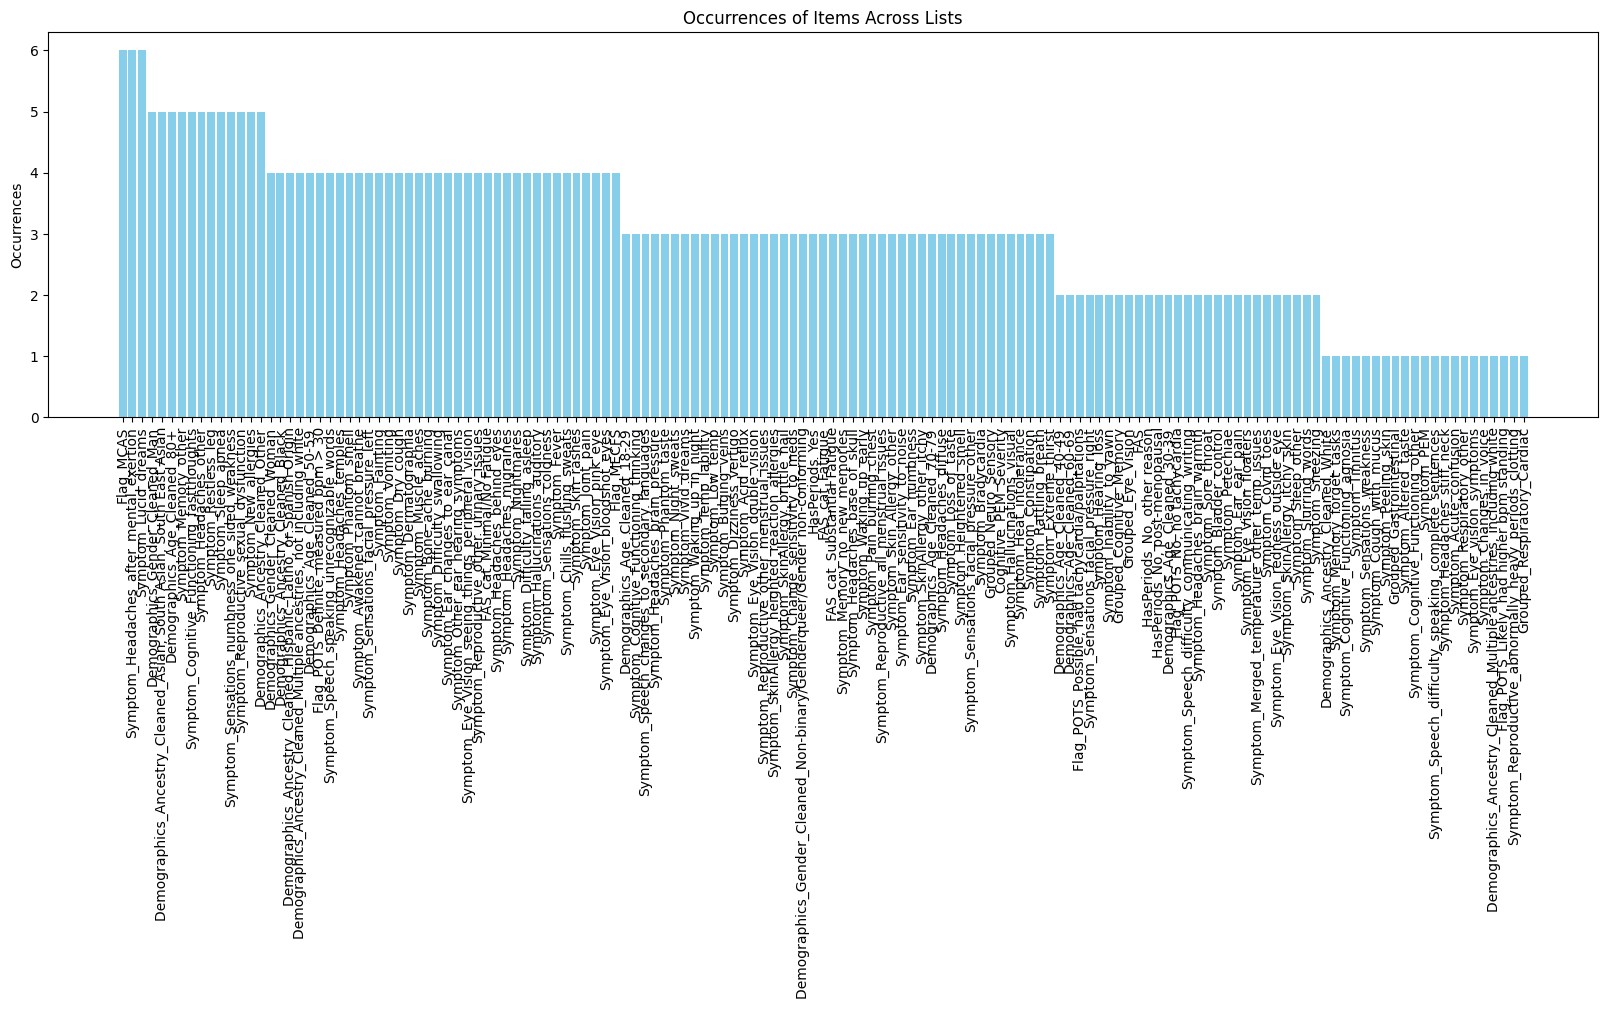

In [4]:
import matplotlib.pyplot as plt

# Combining all lists into one list for iteration
all_lists = [two_point_tournament, one_point_tournament1, one_point_tournament2, uniform_roulette, two_point_roulette, one_point_roulette]

# Initialize the master dictionary
master_dict = {}

# Iterate through each list and update the master dictionary
for lst in all_lists:
    for item in lst:
        # Check if the item is a number (like depth, latent dimension, etc.)
        if not isinstance(item, (int, float)):
            # If not, increase its count in the master dictionary
            master_dict[item] = master_dict.get(item, 0) + 1

# Sort master_dict by occurrences (values) in descending order
sorted_items = sorted(master_dict.items(), key=lambda x: x[1], reverse=True)
items, counts = zip(*sorted_items)  # Unzip items and counts

# Plotting the bar chart
plt.figure(figsize=(20, 5))
plt.bar(items, counts, color='skyblue')
plt.xticks(rotation=90)
plt.ylabel('Occurrences')
plt.title('Occurrences of Items Across Lists')
plt.show()